<h1>Activity 2: UK_ACCIDENT_DATA OVERVIEW</h1>
<p>Analyst: Arnel N. Caparros</p>
<hr>

In [55]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
accidents = pd.read_csv('uk_accident_data.csv')

In [57]:
accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Extracting Date Information Using Pandas Date Time</h1>
<h1>And Changing to Null Value</h1>
<hr>

In [58]:

accidents['Accident Date'] = accidents['Accident Date'].astype(str)
accidents['Accident Date'] = accidents['Accident Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
accidents['Accident Date'] = accidents['Accident Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], dayfirst=True, errors='coerce')

accidents['Latitude'] = accidents['Latitude'].fillna(accidents['Latitude'].mode()[0])
accidents['Longitude'] = accidents['Longitude'].fillna(accidents['Longitude'].mode()[0])
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].fillna('unaccounted')
accidents['Road_Type'] = accidents['Road_Type'].fillna('unaccounted')
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].fillna('unaccounted_weather_condition')
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].fillna('unknown_area')
accidents.dtypes
accidents.isnull().sum()

accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], errors='coerce')
accidents['Accident Date'].fillna(pd.Timestamp("2000-01-01"), inplace=True)

accidents['Year'] = accidents['Accident Date'].dt.year
accidents['Month'] = accidents['Accident Date'].dt.month
accidents['Day'] = accidents['Accident Date'].dt.day
accidents['DayOfWeek'] = accidents['Accident Date'].dt.dayofweek

accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h1>Replacing Day using LOC</h1>
<hr>

In [59]:
accidents['Day'] = 'Weekday'

accidents.loc[accidents['DayOfWeek'].isin([4, 5, 6]), 'Day'] = 'Weekend'

In [60]:
accidents.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Year                                int32
Month                               int32
Day                                object
DayOfWeek                           int32
dtype: object

In [61]:
accidents['Index'] = accidents['Index'].astype('str')
accidents['Accident_Severity'] = accidents['Accident_Severity'].astype('category')
accidents['Light_Conditions'] = accidents['Light_Conditions'].astype('category')
accidents['District Area'] = accidents['District Area'].astype('category')
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].astype('category')
accidents['Road_Type'] = accidents['Road_Type'].astype('category')
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].astype('category')
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].astype('category')
accidents['Vehicle_Type'] = accidents['Vehicle_Type'].astype('category')
accidents['Day'] = accidents['Day'].astype('category')

In [62]:
accidents['Day'].value_counts()

Day
Weekday    366299
Weekend    294380
Name: count, dtype: int64

<h1>EXPLORATORY DATA ANALYTICS (EDA)</h1>
<hr>

<h2>1. How many total accidents are recorded in the dataset?</h2>

In [63]:
total_accidents = accidents.shape[0]

In [64]:
total_accidents

660679

<h2>Insight NO.1: </h2>
<p>The total accidents are recorded in the dataset is "660679"</p>
<hr>

<h2>2.What Light_Conditions do most accidents occur?</h2>

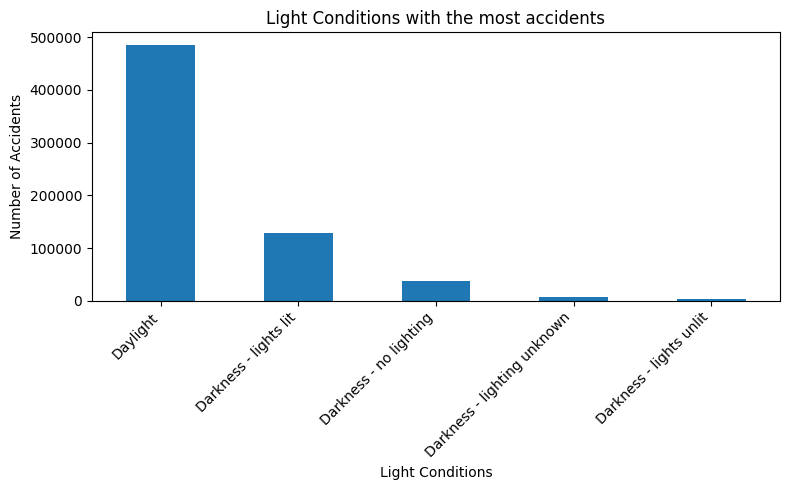

In [107]:
light_con = accidents['Light_Conditions'].value_counts()

light_con.plot(kind="bar", figsize=(8,5), title="Light Conditions with the most accidents")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<h2>Insight NO.2: </h2>
<p>The Light_Conditions with the most accidents occur was Daylight</p>
<hr>

<h2>3. What is the distribution of accidents by severity?</h2>

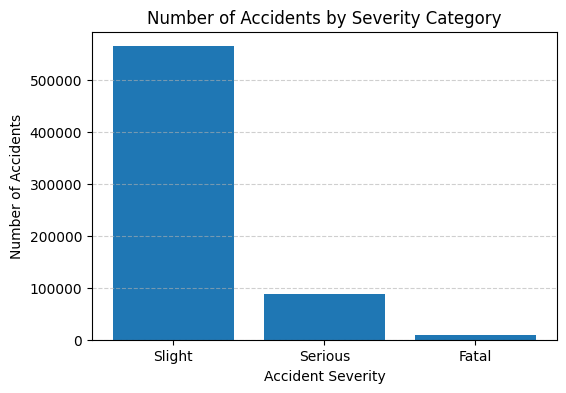

In [106]:
severity_counts = accidents['Accident_Severity'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(severity_counts.index, severity_counts.values)
plt.title("Number of Accidents by Severity Category")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<h2>Insight NO.3: </h2>
The distribution of accidents by severity are:</p>
Slight     </p>
Serious     </p>
Fatal        </p>
<hr>

<h1>4. Which severity category has the highest number of accidents?</h1>

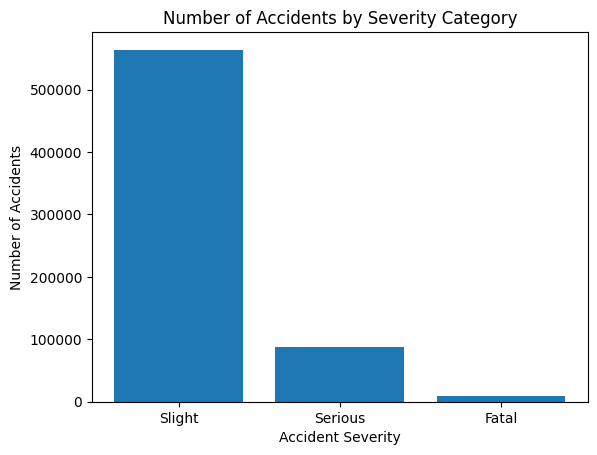

In [110]:
severity_counts = accidents['Accident_Severity'].value_counts()

plt.bar(severity_counts.index, severity_counts.values)
plt.title("Number of Accidents by Severity Category")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.show()

<h2>Insight NO.4: </h2>
<p>The severity category with the highest number of accidents is "Slight"</p>
<hr>


<h1>5. Which District Area has the most accidents?</h1> 

In [119]:
accidents['District Area'].value_counts().idxmax()

'Birmingham'

<h2>Insight NO.5: </h2>
<p>The District Area with the most accidents is "Birmingham"</p>
<hr>

<h1>6. Are urban areas riskier than rural areas in terms of accident counts?</h1>

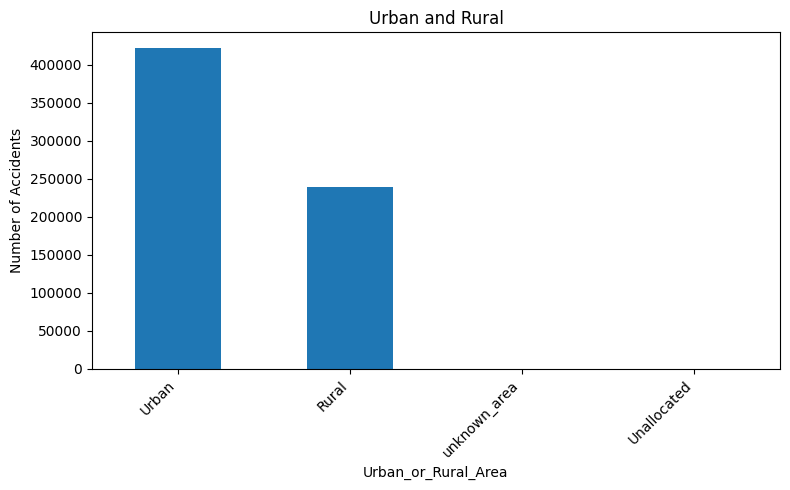

In [117]:
accidents['Urban_or_Rural_Area'].value_counts()

urban_or_rural = accidents['Urban_or_Rural_Area'].value_counts()

urban_or_rural.plot(kind="bar", figsize=(8,5), title="Urban and Rural")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<h2>Insight NO.6: </h2>
<p>The data shows that it is riskier to Urban to rural</p>
<hr>

<h1>7. What Road_Surface_Conditions has the most accidents?</h1>

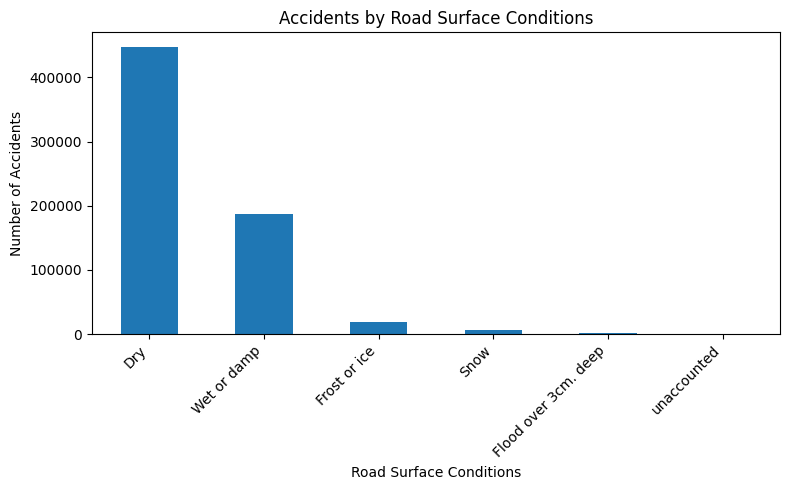

In [118]:
accidents['Road_Surface_Conditions'].value_counts()

road_counts = accidents['Road_Surface_Conditions'].value_counts()

road_counts.plot(kind="bar", figsize=(8,5), title="Accidents by Road Surface Conditions")
plt.xlabel("Road Surface Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<h2>Insight NO.7: </h2>
<p>The data shows that the Road_Surface_Conditions with the highest accidents is "Dry"</p>
<hr>

<h1>8. How many Number_of_Casualties are recorded in the dataset?
</h1>

In [121]:
accidents['Number_of_Casualties'].sum()

np.int64(896568)

<h2>Insight NO.7: </h2>
<p>The Number_of_Casualties that recorded in the dataset is "896568"</p>
<hr>

<h1>9. What is the max Number_of_Casualties that recorded in the dataset? ¶</h1>

In [68]:
accidents['Number_of_Casualties'].max()

np.int64(68)

<h2>Insight NO.7: </h2>
<p>The max Number_of_Casualties that recorded in the dataset is "68"</p>
<hr>

<h1>10. Do accidents occur more frequently on single carriageways, dual carriageways, or motorways?</h1>

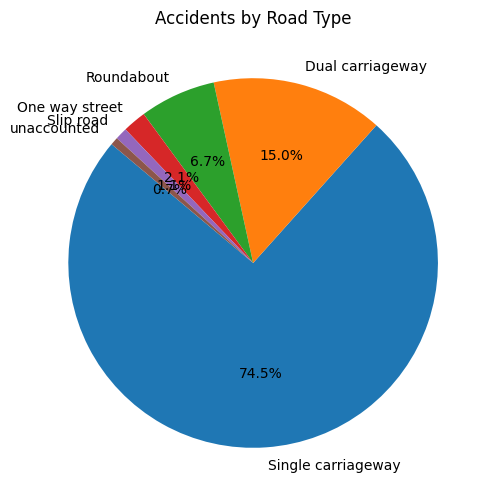

In [123]:
road_type_counts = accidents['Road_Type'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(road_type_counts.values, labels=road_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Accidents by Road Type")
plt.show()

<h2>Insights NO. 10: </h2>
<p>The data shows that in the "Single carriageway", accidents occurs more</p>
<hr>

<h1>11. Is there a correlation between Number_of_Casualties and Number_of_Vehicles?</h1>

In [70]:
accidents[['Number_of_Casualties','Number_of_Vehicles']].corr()

,Number_of_Casualties,Number_of_Vehicles
Number_of_Casualties,1.000000,0.228889
Number_of_Vehicles,0.228889,1.000000


<h2>Insights NO. 11: </h2>
<p>It shows that as the number of vehicles increases, casualties tend to increase slightly, but the relationship is weak.</p>
<hr>

<h1>12. How many vehicles are involved per Accident_Severity (Slight, Serious and Fatal)?</h1>

In [130]:
avg_by_severity = accidents.groupby("Accident_Severity")["Number_of_Vehicles"].sum()

In [131]:
avg_by_severity

Accident_Severity
Fatal        15477
Serious     148057
Slight     1046338
Name: Number_of_Vehicles, dtype: int64

<h2>Insights NO. 12: </h2>
<p>The data shows the number of vehicles involved in Slight is "1046338", in Serious is "148057" and in Fatal is "15477"
</p><hr>

<h1>13. What is the average Number_of_Casualties per accident by Urban_or_Rural_Area?</h1>

In [73]:
accidents.groupby("Urban_or_Rural_Area")["Number_of_Casualties"].mean()

Urban_or_Rural_Area
Rural           1.479204
Unallocated     1.181818
Urban           1.287815
unknown_area    1.066667
Name: Number_of_Casualties, dtype: float64

<h2>Insights NO. 13:</h2>
<p>The data shows that the average Number_of_Casualties in Urban is "1.287815", in Rural "1.479204", and in Unallocated "1.181818"
</p>
<hr>

<h1>14. What Vehicle_Type is the most prone to accidents base on the data</h1>

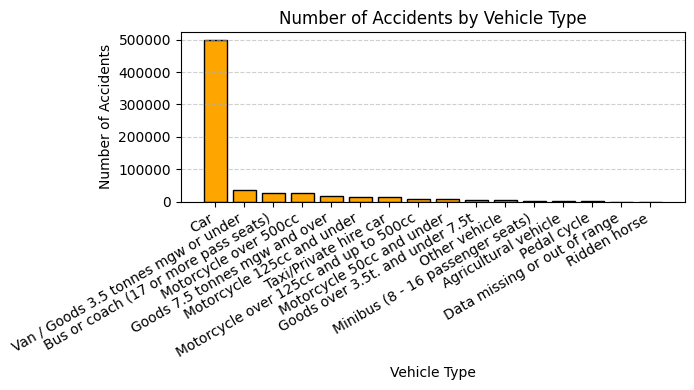

In [132]:
vehicle_counts = accidents['Vehicle_Type'].value_counts()

# Plot bar chart
plt.figure(figsize=(7, 4))
plt.bar(vehicle_counts.index, vehicle_counts.values, color="orange", edgecolor="black")
plt.title("Number of Accidents by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=30, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<h2>Insights NO. 14: </h2>
<p>The data shows that the Vehicle_Type with the most prone to accidents is "Car"</p>
<hr>

<h1>15. What is the highest Number_of_Vehicles involved in an accidents?</h1>

In [75]:
accidents['Number_of_Vehicles'].max()

np.int64(32)

<h2>Insights NO. 15: </h2>
<p>The highest Number_of_Vehicles involved in an accidents s "32"</p>
<hr>

<h1>16. Is there a correlation between latitude and longitude</h1>

In [134]:
accidents.dropna(subset=["Latitude","Longitude"])["Latitude"].corr(accidents["Longitude"])


np.float64(-0.3981137948101017)

<h2>Insights NO. 16:</h2>
<p> As the data shows the correlation between lattitude and longitude is -0.3981136594753895, meaning there was no correlation between them.</p>
<hr>

<h1>17. How does the number of vehicles correlate with light conditions
</h1>

In [137]:
vehicles_light = accidents.groupby("Light_Conditions")["Number_of_Vehicles"].mean()
vehicles_light

Light_Conditions
Darkness - lighting unknown    1.758482
Darkness - lights lit          1.775498
Darkness - lights unlit        1.752654
Darkness - no lighting         1.599781
Daylight                       1.865385
Name: Number_of_Vehicles, dtype: float64

<h2>Insights NO. 17:</h2>
<p>
Daylight has the highest average (1.87)</p>
Darkness - no lighting has the lowest (1.60)</p>
Other lighting conditions are similar (~1.75)</p>
It means that daylight is the most prone in accidents maybe because of traffic
<hr>

<h1>18. Which Road_Type has the highest number of accidents in urban vs rural areas?</h1>

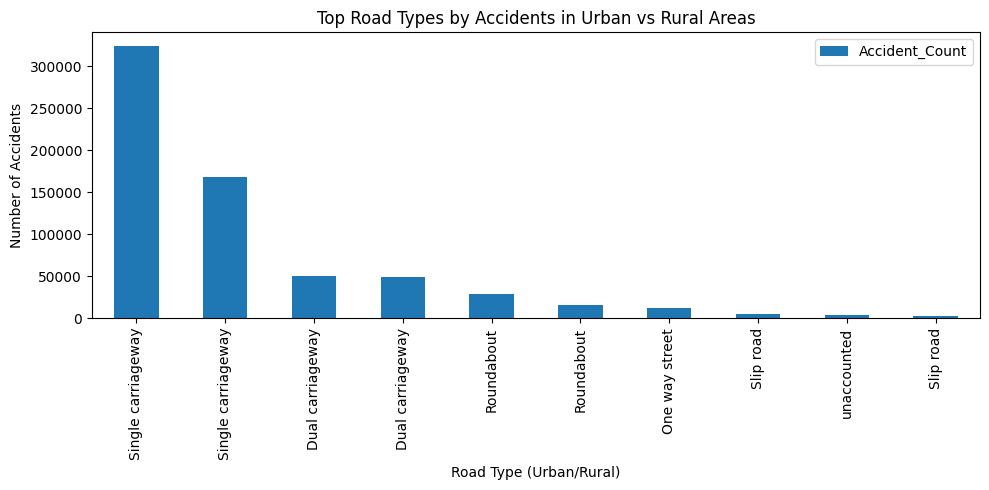

In [138]:
area_road_counts = accidents.groupby(["Urban_or_Rural_Area", "Road_Type"]).size()
area_road_counts = area_road_counts.reset_index(name='Accident_Count')
area_road_counts.sort_values("Accident_Count", ascending=False).head(10).plot(
    x="Road_Type", 
    y="Accident_Count", 
    kind="bar",
    figsize=(10,5),
    title="Top Road Types by Accidents in Urban vs Rural Areas"
)

plt.xlabel("Road Type (Urban/Rural)")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

<h2>Insights NO. 18: </h2>
<p>Tha data shows that the Road_Type that has the highest number of accidents in urban vs rural areas is "Single carriageway"</p>
<hr>

<h1>19. What District Area has the highest number of accidents?</h1>

In [139]:
accidents["District Area"].value_counts().head(1)

District Area
Birmingham    13491
Name: count, dtype: int64

<h2>Insights NO. 19: </h2>
<p>The District Area with the highest number of accidents is "Birmingham" with "13491" accidents</p>
<hr>

<h1>20. Is there a same Latitude in the table?</h1>

In [81]:
duplicate_lat = accidents["Latitude"].duplicated().sum()

In [82]:
duplicate_lat

np.int64(149061)

<h2>Insights NO. 20: </h2>
<p>Yes! There is a total of "149060" that has the same Latitude in the table</p>
<hr>

<h1>21-23.Which year recorded the highest number of accidents?</h1>
<h1>Which year recorded the lowest number of accidents?</h1>
<h1>How many accidents happened in each year?</h1>

In [141]:
accidents_per_year = accidents.groupby(accidents["Accident Date"].dt.year).size()
accidents_per_year

Accident Date
2019    182115
2020    170591
2021    163554
2022    144419
dtype: int64

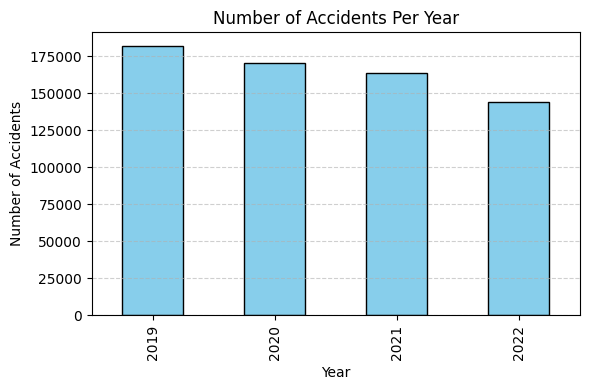

In [143]:
accidents_per_year = accidents.groupby(accidents["Accident Date"].dt.year).size()

plt.figure(figsize=(6, 4))
accidents_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Accidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(axis='y', linestyle='--', alpha=0.6)

max_year = accidents_per_year.idxmax()
min_year = accidents_per_year.idxmin()

plt.tight_layout()
plt.show()

<h2>Insights NO. 21 - 23:</h2>
<p> The highest number af accidents by year is "2019"</p>
The lowest number af accidents by year is "2022"</p>
The number af accidents happened by year are:</p>
in 2019    182115,</p>
in 2020    170591,</p>
in 2021    163554, </p>
and 2022    144419</p>
<hr>

<h1>24. Are there more accidents on weekends than weekdays?</h1>

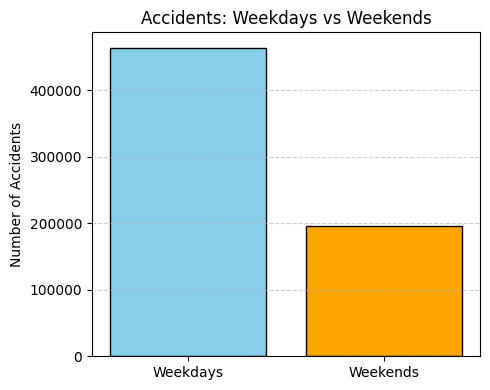

In [146]:
weekend = accidents[accidents["Accident Date"].dt.day_name().isin(["Saturday", "Sunday"])].shape[0]
weekday = accidents[~accidents["Accident Date"].dt.day_name().isin(["Saturday", "Sunday"])].shape[0]

labels = ["Weekdays", "Weekends"]
values = [weekday, weekend]

plt.figure(figsize=(5, 4))
plt.bar(labels, values, color=["skyblue", "orange"], edgecolor="black")
plt.title("Accidents: Weekdays vs Weekends")
plt.ylabel("Number of Accidents")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

<h2>Insights NO. 24:</h2>
<p> It shows that there more accidents in weekdays than in weekends</p>
<hr>

<h1>25. Does the number of vehicles involved in accidents change over the years?</h1>

In [85]:
accidents.groupby(accidents["Accident Date"].dt.year)["Number_of_Vehicles"].mean()

Accident Date
2019    1.839310
2020    1.826615
2021    1.826229
2022    1.832273
Name: Number_of_Vehicles, dtype: float64

<h2>Insights NO. 25: </h2>
<p>Yes, but not much, because the numbers slightly fluctuate but remain almost constant.</p>
<hr>

<h1>26. How does the number of accidents vary by severity across different years?</h1>

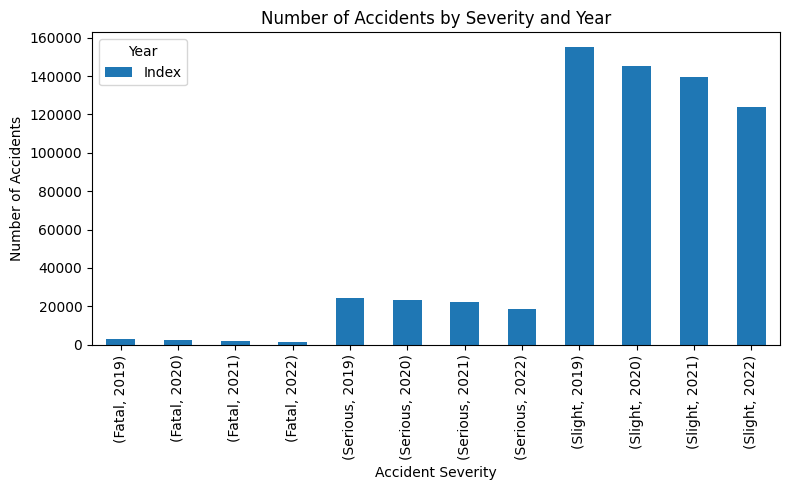

In [87]:
severity = accidents.groupby(['Accident_Severity', 'Year'])['Index'].count()
severity.unstack()
severity.plot(kind='bar', figsize=(8,5))
plt.title("Number of Accidents by Severity and Year")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.legend(title="Year")
plt.tight_layout()
plt.show()

<h1>Insight No. 26. </h1>
<p>The data shows that Slight accidents happen most often each year, while fatal ones are the least frequent.</p>
<hr>

<h1>27. Which district area has the highest Fatal accidents?</h1>

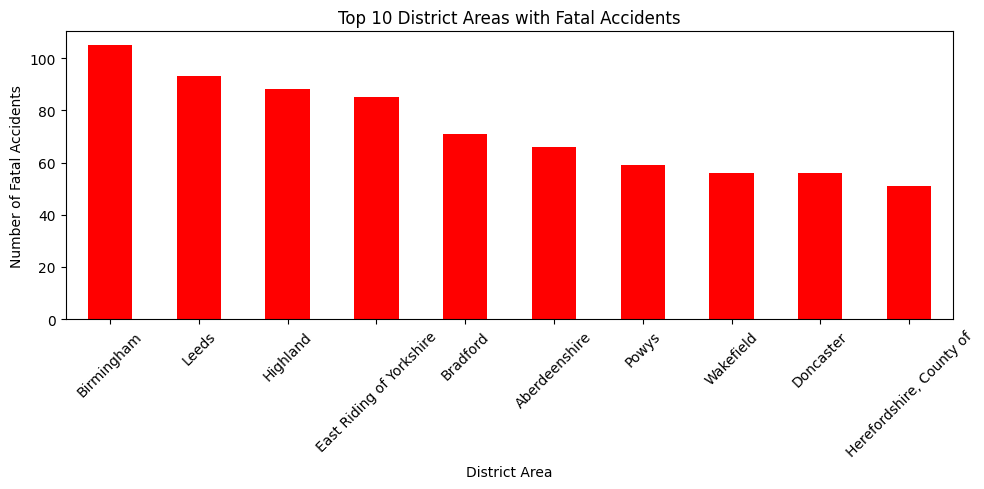

In [88]:
fatal_accidents = accidents[accidents["Accident_Severity"] == "Fatal"]
fatal_counts = fatal_accidents.groupby("District Area").size().sort_values(ascending=False)

fatal_counts.head(10).plot(kind='bar', figsize=(10,5), color='red')
plt.title("Top 10 District Areas with Fatal Accidents")
plt.xlabel("District Area")
plt.ylabel("Number of Fatal Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Insight No.27</h1>
<p>The data shows that the district area with the highest accidents is "Birmingham"</p>
<hr>

<h1>28. Which district area has the fewest slight accidents?</h1>

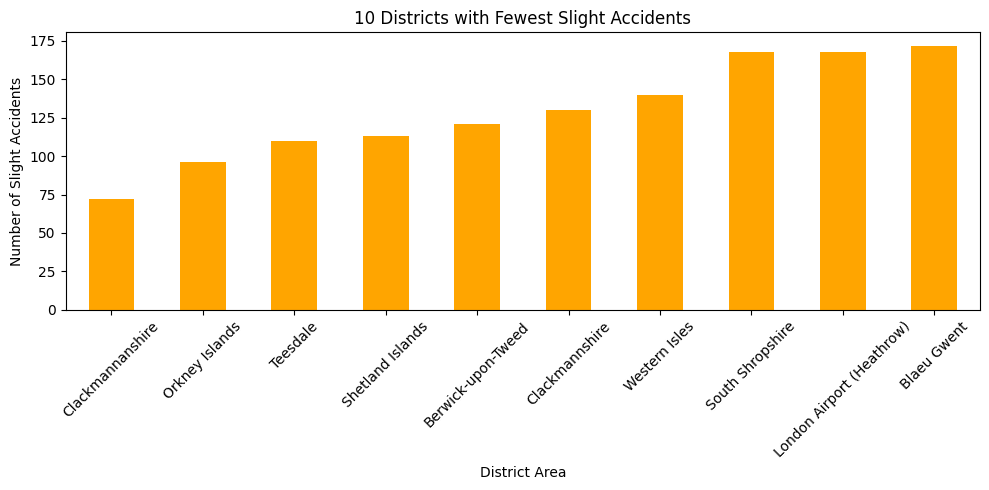

In [89]:
slight_counts = accidents[accidents["Accident_Severity"] == "Slight"].groupby("District Area").size()

slight_counts.sort_values(ascending=True).head(10).plot(
    kind="bar",
    figsize=(10,5),
    color="orange",
    title="10 Districts with Fewest Slight Accidents"
)

plt.xlabel("District Area")
plt.ylabel("Number of Slight Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h1>Insight No. 28</h1>
<p>The data shows that the District area with the lowest Slight accidents is "Clackmannanshire"</p>
<hr>

<h1>29. Which district area has the fewest Serious accidents?</h1>

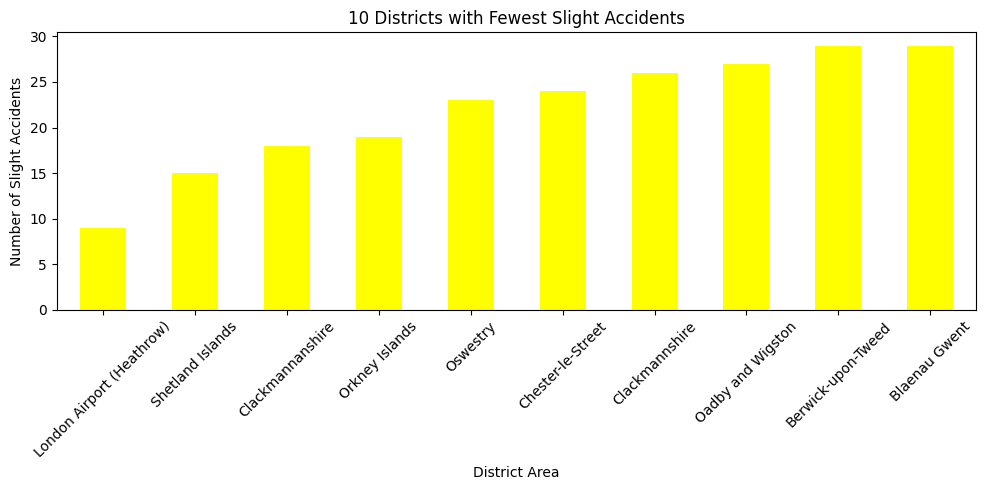

In [90]:
slight_counts = accidents[accidents["Accident_Severity"] == "Serious"].groupby("District Area").size()

slight_counts.sort_values(ascending=True).head(10).plot(
    kind="bar",
    figsize=(10,5),
    color="yellow",
    title="10 Districts with Fewest Slight Accidents"
)

plt.xlabel("District Area")
plt.ylabel("Number of Slight Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h1>Insight No. 29</h1>
<p>The data shows that the District area with the lowest Serious accidents is "London Airport (Heathrow)</p>
<hr>

<h1> 30. Trend of accidents for Birmingham by year</h1>

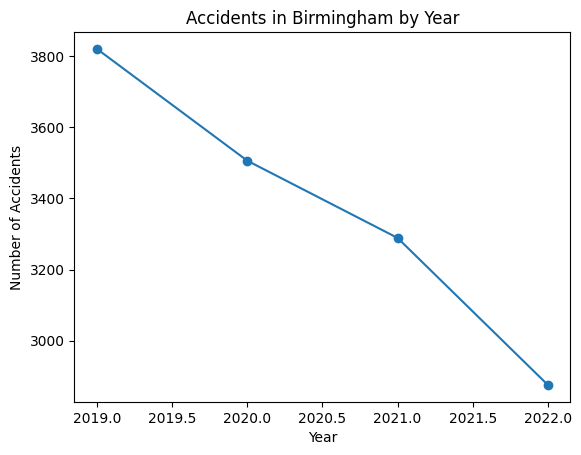

In [161]:
# Trend of accidents for that district by year
accidents["Accident Date"] = pd.to_datetime(accidents["Accident Date"], dayfirst=True)
district_trend = accidents[accidents["District Area"] == 'Birmingham'].groupby(accidents["Accident Date"].dt.year).size()

district_trend.plot(kind="line", marker="o", title=f"Accidents in {'Birmingham'} by Year")
plt.ylabel("Number of Accidents")
plt.xlabel("Year")
plt.show()


<h1>Insights No.30</h1>
<p>The data shows that since 2019, the accident trend has been decreasing.</p>

<h1>31. In which month did Manchester record the highest number of accidents? </h1>

Month with highest accidents in Manchester: 10


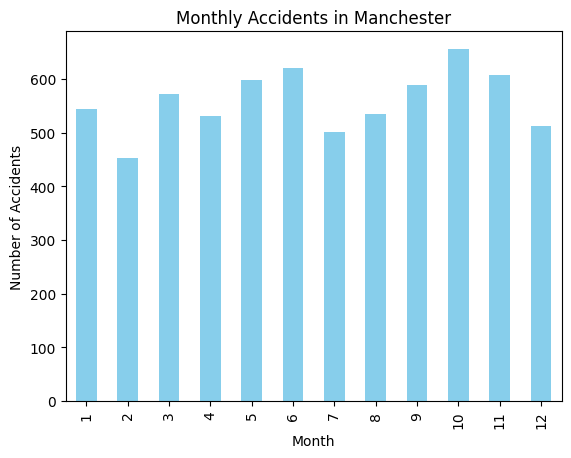

In [167]:
accidents["Accident Date"] = pd.to_datetime(accidents["Accident Date"], dayfirst=True)
accidents["Month"] = accidents["Accident Date"].dt.month
accidents["Year"] = accidents["Accident Date"].dt.year

district_Manchester = accidents[accidents["District Area"] == "Manchester"]

highest_month = district_Manchester.groupby("Month").size().idxmax()
print("Month with highest accidents in Manchester:", highest_month)

monthly_accidents = district_Manchester.groupby("Month").size()
monthly_accidents.plot(kind='bar', color='skyblue', title="Monthly Accidents in Manchester")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.show()

<h2>Insight No 31.</h2>
<p>The data shows that the month in Manchester with the highest number of accidents is "October"</p>

<h1>32. In which month did Clackmannanshire record the highest number of accidents? </h1>

Month with highest accidents in Clackmannanshire: 1


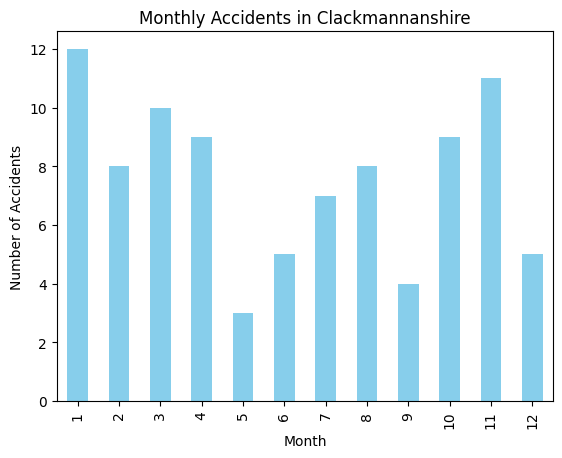

In [170]:
accidents["Accident Date"] = pd.to_datetime(accidents["Accident Date"], dayfirst=True)
accidents["Month"] = accidents["Accident Date"].dt.month
accidents["Year"] = accidents["Accident Date"].dt.year

district_Clackmannanshire = accidents[accidents["District Area"] == "Clackmannanshire"]

highest_month = district_Clackmannanshire.groupby("Month").size().idxmax()
print("Month with highest accidents in Clackmannanshire:", highest_month)

monthly_accidents = district_Clackmannanshire.groupby("Month").size()
monthly_accidents.plot(kind='bar', color='skyblue', title="Monthly Accidents in Clackmannanshire")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.show()

<h2>Insight No 32.</h2>
<p>The data shows that the month in Clackmannanshire with the highest number of accidents is "January"</p>

<h1>33. Fatal accidents trend by year</h1>

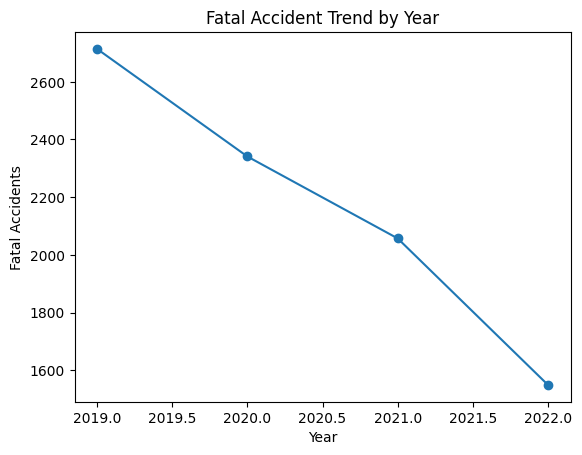

In [91]:
fatal_trend = accidents[accidents["Accident_Severity"] == "Fatal"].groupby("Year").size()
fatal_trend.plot(kind="line", marker="o", title="Fatal Accident Trend by Year", ylabel="Fatal Accidents")
plt.show()

<h1>Insights No.33</h1>
<p>The data shows that since 2019, the accident trend has been decreasing.</p>
<hr>

In [92]:
import folium
from folium.plugins import HeatMap

In [93]:
london_df = accidents[accidents['District Area']== 'City of London']

In [94]:
london_fatal = london_df[london_df['Accident_Severity'] == 'Fatal']


In [95]:
locations  = list(zip(london_fatal['Latitude'],london_fatal['Longitude']))

m = folium.Map(location=[london_fatal['Latitude'].mean(), london_fatal['Longitude'].mean()], zoom_start=10)


HeatMap(locations).add_to(m)

m.save('accident_heatmap.html') 
m 